In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
import os
import re

In [325]:
# assign directory
directory = '/Users/ralphonseraj/Desktop/M.Tech-DSML-PES-Univ/Capstone Project/Historic_Election_Results/UP_Election/2012/Individual AC Data'

res = pd.DataFrame(columns=['AC_Name','# #','Position','Name','Votes','Votes %','Party'])

# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    name, extension = os.path.splitext(f)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_excel(f, sheet_name = 0, skiprows = 0)
        df['AC_Name'] = filename.split('.')[0]
        res = res.append(df)
        
res = res.reset_index()

In [326]:
res.head()

index  AC_Name # # Position                Name  Votes Votes %  \
0      0  Lambhua   1        5  Ajay Prakash Singh  6,206    3.4%   
1      1  Lambhua   2        8          Anil Kumar  1,201    0.7%   
2      2  Lambhua   3        6            Babu Lal  2,088    1.2%   
3      3  Lambhua   4        7        Gopi Chandra  1,570    0.9%   
4      4  Lambhua   5       17         Jai Prakash    526    0.3%   

                                         Party  Unnamed: 0  
0                                  Peace Party         NaN  
1                   Nationalist Congress Party         NaN  
2               Most Backward Classes Of India         NaN  
3                                  Independent         NaN  
4  Socialist Unity Centre Of India (COMMUNIST)         NaN

In [21]:
#improper_df = res[res['Party All Party Results'].notnull()]
#improper_df

In [327]:
df = res

In [328]:
df = df.drop(['# #', 'Unnamed: 0'],axis=1)
df.head()

index  AC_Name Position                Name  Votes Votes %  \
0      0  Lambhua        5  Ajay Prakash Singh  6,206    3.4%   
1      1  Lambhua        8          Anil Kumar  1,201    0.7%   
2      2  Lambhua        6            Babu Lal  2,088    1.2%   
3      3  Lambhua        7        Gopi Chandra  1,570    0.9%   
4      4  Lambhua       17         Jai Prakash    526    0.3%   

                                         Party  
0                                  Peace Party  
1                   Nationalist Congress Party  
2               Most Backward Classes Of India  
3                                  Independent  
4  Socialist Unity Centre Of India (COMMUNIST)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6839 entries, 0 to 6838
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6839 non-null   int64 
 1   AC_Name   6839 non-null   object
 2   Position  6839 non-null   object
 3   Name      6839 non-null   object
 4   Votes     6839 non-null   object
 5   Votes %   6839 non-null   object
 6   Party     6839 non-null   object
dtypes: int64(1), object(6)
memory usage: 374.1+ KB


In [330]:
df.isnull().sum()

index       0
AC_Name     0
Position    0
Name        0
Votes       0
Votes %     0
Party       0
dtype: int64

In [331]:
df.sort_values('Position')

index          AC_Name Position  \
2084      1       Chhibramau        1   
1589     20        Bhognipur        1   
1597      7  Rampur Karkhana        1   
5771     16        Najibabad        1   
1620      2         Bansgaon        1   
...     ...              ...      ...   
5031     15  Gorakhpur Urban       31   
5497     21      Govindnagar       32   
846      15       Pratapgarh       32   
5502     26      Govindnagar       33   
5504     28      Govindnagar       34   

                                           Name   Votes Votes %  \
2084                         Arvind Singh Yadav  70,372   31.3%   
1589                         Yogendra Pal Singh  57,555   29.3%   
1597  Choudhari Fasiha Bashir Alias Gajala Lari  51,834   29.2%   
5771                                    Tasleem  62,713   33.5%   
1620                            Dr. Vijay Kumar  53,690   35.6%   
...                                         ...     ...     ...   
5031                            Raghunath Singh     145    0.1%   
5497                            Rupendra Rajpal     148    0.1%   
846                                 Mohd Irshad     295   0.002   
5502                          Shiv Kumar Pasvan     148    0.1%   
5504                        Shyam Naresh Bajpai     133    0.1%   

                          Party  
2084            Samajwadi Party  
1589            Samajwadi Party  
1597            Samajwadi Party  
5771        Bahujan Samaj Party  
1620        Bahujan Samaj Party  
...                         ...  
5031                Independent  
5497                Independent  
846                 Independent  
5502  National Loktantrik Party  
5504                Independent  

[6839 rows x 7 columns]

In [332]:
df.index

RangeIndex(start=0, stop=6839, step=1)

In [333]:
for i, row in df.iterrows():
    val = str(df.at[i, 'Votes'])
    if ',' in val:
        df.at[i, 'Votes'] = df.at[i, 'Votes'].replace(',', '')

In [334]:
df['Votes'] = df['Votes'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6839 entries, 0 to 6838
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6839 non-null   int64 
 1   AC_Name   6839 non-null   object
 2   Position  6839 non-null   object
 3   Name      6839 non-null   object
 4   Votes     6839 non-null   int64 
 5   Votes %   6839 non-null   object
 6   Party     6839 non-null   object
dtypes: int64(2), object(5)
memory usage: 374.1+ KB


In [335]:
df_p_1 = df[df['Position']==1.0]
df_p_1

index     AC_Name Position                   Name   Votes Votes %  \
13       13     Lambhua        1                Santosh   74352   41.2%   
18        1       Sadar        1             Arun Kumar   71939   43.0%   
41        8      Baldev        1         Pooran Prakash   79364   41.5%   
47        2       Kunda        1  Raghuraj Pratap Singh  111392   68.0%   
62        7  Saiyadraja        1            Manoj Kumar   51499   29.2%   
...     ...         ...      ...                    ...     ...     ...   
6740      5      Bairia        1     Jai Prakash Anchal   46092   32.1%   
6764     14      Shamli        1     Pankaj Kumar Malik   53947   32.1%   
6783      7  Khalilabad        1          Dr. Moh. Ayub   55841   27.0%   
6798      3        Bara        1          Dr.Ajay Kumar   46182   26.8%   
6819      1     Barauli        1          Dalveer Singh   80440   39.4%   

                         Party  
13             Samajwadi Party  
18             Samajwadi Party  
41           Rashtriya Lok Dal  
47                 Independent  
62                 Independent  
...                        ...  
6740           Samajwadi Party  
6764  Indian National Congress  
6783               Peace Party  
6798           Samajwadi Party  
6819         Rashtriya Lok Dal  

[403 rows x 7 columns]

In [336]:
df_p_1['Votes %'] = df_p_1['Votes %'].str.replace("%","")

In [337]:
df_p_1['Votes %'] = df_p_1['Votes %'].astype('float64')
df_p_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 13 to 6819
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     403 non-null    int64  
 1   AC_Name   403 non-null    object 
 2   Position  403 non-null    object 
 3   Name      403 non-null    object 
 4   Votes     403 non-null    int64  
 5   Votes %   365 non-null    float64
 6   Party     403 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 25.2+ KB


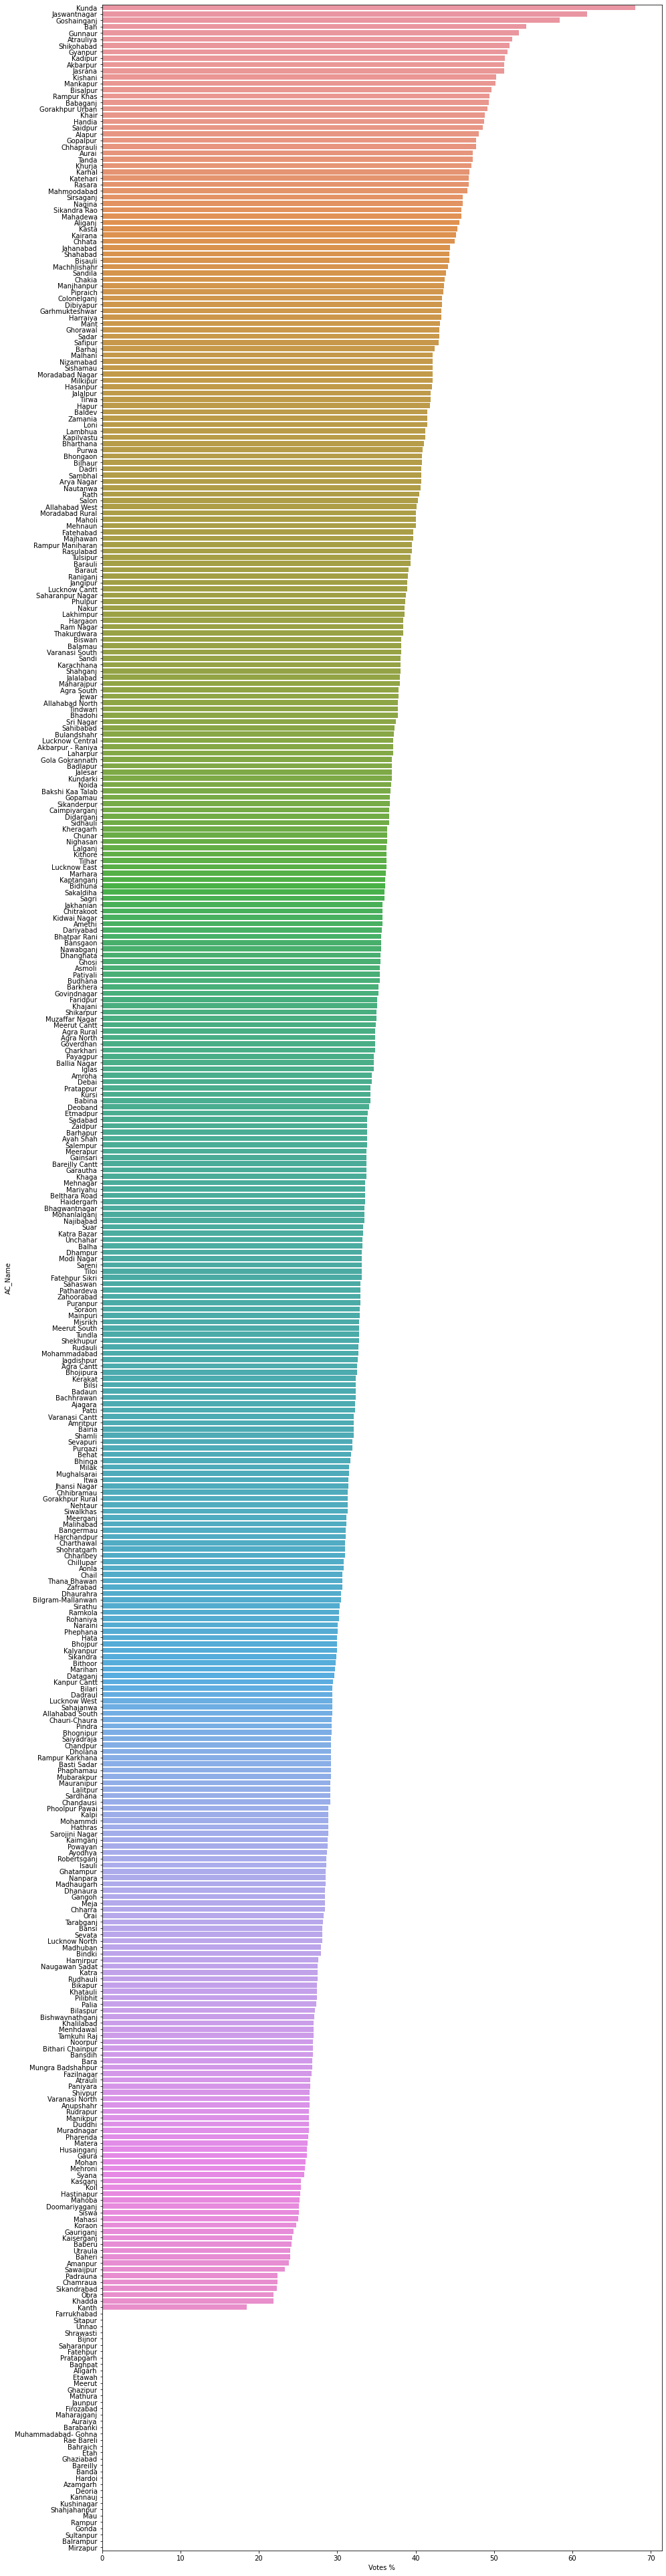

In [338]:
plt.figure(figsize=(15,70))
sns.barplot(x='Votes %', y='AC_Name',data=df_p_1,order=df_p_1.sort_values('Votes %',ascending=False)["AC_Name"],orient="h")
plt.show()

In [339]:
df_c_r = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]
df_c_r.head()

index  AC_Name Position               Name  Votes Votes %  \
13     13  Lambhua        1            Santosh  74352   41.2%   
16     16  Lambhua        2        Vinod Singh  56980   31.6%   
18      1    Sadar        1         Arun Kumar  71939   43.0%   
25      8    Sadar        2         Raj Prasad  51032   30.5%   
35      2   Baldev        2  Chandrabhan Singh  47270   24.7%   

                  Party  
13      Samajwadi Party  
16  Bahujan Samaj Party  
18      Samajwadi Party  
25  Bahujan Samaj Party  
35  Bahujan Samaj Party

In [340]:
df_c_r['Votes'] = df_c_r['Votes'].astype('int64')
df_c_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 13 to 6835
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     806 non-null    int64 
 1   AC_Name   806 non-null    object
 2   Position  806 non-null    object
 3   Name      806 non-null    object
 4   Votes     806 non-null    int64 
 5   Votes %   806 non-null    object
 6   Party     806 non-null    object
dtypes: int64(2), object(5)
memory usage: 50.4+ KB


In [341]:
plt.figure(figsize=(12,12))
fig = px.treemap(df_c_r, 
                 path=[px.Constant('all'), 'AC_Name','Party'], 
                 values='Votes',
                 color='Party')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x864 with 0 Axes>

In [342]:
df_c_r1 = df_c_r[df_c_r['Position'] == 1.0]
df_c_r1.head()

index     AC_Name Position                   Name   Votes Votes %  \
13     13     Lambhua        1                Santosh   74352   41.2%   
18      1       Sadar        1             Arun Kumar   71939   43.0%   
41      8      Baldev        1         Pooran Prakash   79364   41.5%   
47      2       Kunda        1  Raghuraj Pratap Singh  111392   68.0%   
62      7  Saiyadraja        1            Manoj Kumar   51499   29.2%   

                Party  
13    Samajwadi Party  
18    Samajwadi Party  
41  Rashtriya Lok Dal  
47        Independent  
62        Independent

In [343]:
df_c_r1.sort_values('Votes', ascending=False, inplace=True)
df_c_r1

index       AC_Name Position                        Name   Votes  \
2497      5  Jaswantnagar        1         Shivpal Singh Yadav  133563   
3117      0     Sahibabad        1                     Amarpal  124332   
5082      0   Goshainganj        1                 Abhay Singh  122235   
5229      0      Bisalpur        1        Agys Ram Saran Verma  111735   
47        2         Kunda        1       Raghuraj Pratap Singh  111392   
...     ...           ...      ...                         ...     ...   
2675     24        Khadda        1           Vijay Kumar Dubey   37260   
282       1         Kanth        1               Aneesurrehman   37092   
864       1      Chamraua        1               Ali Yusuf Ali   37083   
92       14   Farrukhabad        1  Vijay Singh S/o Prem Singh   33005   
3956     25          Obra        1                 Sunil Kumar   31513   

     Votes %                     Party  
2497   61.9%           Samajwadi Party  
3117   37.3%       Bahujan Samaj Party  
5082   58.4%           Samajwadi Party  
5229   49.7%     Bharatiya Janta Party  
47     68.0%               Independent  
...      ...                       ...  
2675   21.9%  Indian National Congress  
282    18.5%               Peace Party  
864    22.4%       Bahujan Samaj Party  
92     0.189               Independent  
3956   21.9%       Bahujan Samaj Party  

[403 rows x 7 columns]

In [344]:
df_c_r1['Party'].value_counts()

Samajwadi Party               224
Bahujan Samaj Party            80
Bharatiya Janta Party          47
Indian National Congress       28
Rashtriya Lok Dal               9
Independent                     6
Peace Party                     4
Quami Ekta Dal                  2
Nationalist Congress Party      1
Apna Dal                        1
Ittehad-E-Millait Council       1
Name: Party, dtype: int64

In [345]:
df_c_r1.replace({'Party': {'Bharatiya Janta Party': 'BJP',
                           'Samajwadi Party': 'SP',
                           'Bahujan Samaj Party':'BSP',
                           'Apna Dal (Soneylal)':'AD',
                           'Indian National Congress':'INC',
                           'Suheldev Bhartiya Samaj Party':'SBSP',
                           'Independent':'Ind',
                           'Ittehad-E-Millait Council':'IC',
                           'Nirbal Indian Shoshit Hamara Aam Dal':'NISHAD',
                           'Nationalist Congress Party': 'NCP',
                           'Rashtriya Lok Dal':'RLD',
                           'Peace Party' : 'PP',
                           'Quami Ekta Dal': 'QED'
                          }},inplace=True)

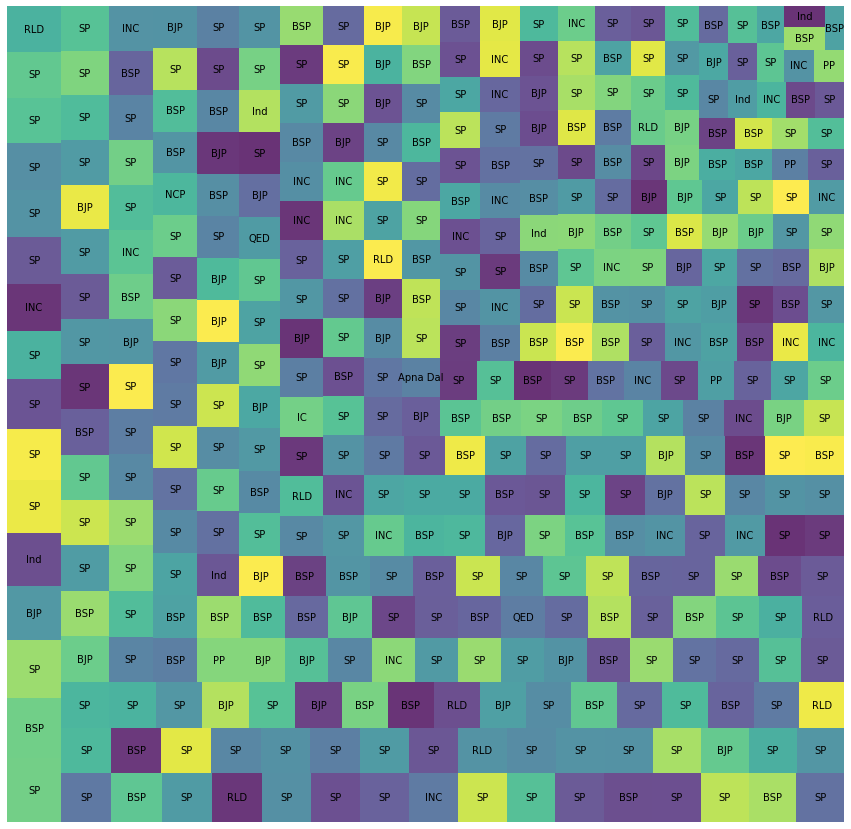

In [346]:
fig, ax = plt.subplots(1, figsize = (15,15))
squarify.plot(sizes=df_c_r1['Votes'], 
              label=df_c_r1['Party'],
              alpha=.8 )
plt.axis('off')
plt.show()

In [379]:
df_final = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]

In [382]:
df_final.sort_values(['AC_Name', 'Votes'], inplace=True)
df_final['diffs'] = df_final.groupby('AC_Name')['Votes'].diff()
df_final['diffs'] = df_final['diffs'].fillna(value=0)

In [384]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_final, 
                 path=[px.Constant('all'), 'Party','AC_Name'], 
                 values='diffs',
                 color='Party',
                 color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

In [426]:
X = df_final[df_final['diffs'] > 0]['diffs'].unique()
X = X.reshape(-1, 1)

In [427]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[0 2 2 2 0 1 0 1 1 2 2 0 0 0 0 2 2 0 0 2 1 0 1 2 2 0 0 1 1 0 0 1 2 2 0 1 0
 2 0 0 0 1 2 2 2 0 0 2 0 0 0 2 2 0 1 2 0 1 1 2 0 0 2 2 2 2 0 0 2 2 1 2 2 0
 0 0 0 2 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 2 0 0 2 2 0 0 1 2 0 0
 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 2 2 2 2 1 0 2
 1 3 2 2 1 1 0 0 1 2 2 1 2 2 1 0 2 0 0 0 2 0 0 1 2 0 2 2 0 1 3 0 0 0 1 2 2
 0 0 0 1 0 0 1 0 0 1 0 1 2 0 0 0 2 1 0 0 0 0 1 0 1 0 0 0 3 2 2 2 2 1 0 0 2
 2 2 2 2 0 0 2 2 0 2 1 1 0 2 0 2 2 0 1 0 0 0 1 2 2 0 2 0 0 0 0 2 0 0 0 0 0
 1 0 0 2 2 1 2 0 2 0 0 0 2 2 2 0 2 0 0 0 2 1 0 0 0 0 0 0 2 2 1 2 1 0 0 0 0
 0 0 0 1 0 1 0 2 0 0 0 0 0 1 0 0 2 1 0 1 1 1 2 3 0 1 1 2 3 2 1 0 2 0 0 0 0
 2 0 0 2 2 2 0 2 1 0 0 2 2 1 2 2 2 0 0 2 0 0 0 2 0 0 0 1 2 2 0 0 1 0 0 0 0
 1 2 2 0 0 2 1 2 0 0 0 1 0 1 0 0 0 2 1 1 0 0 0 0 2 0 2 0 0 2 1]


In [428]:
df1 = pd.DataFrame(X)
df1['label'] = label
df1.rename(columns={0: 'diffs'}, inplace=True)

No handles with labels found to put in legend.


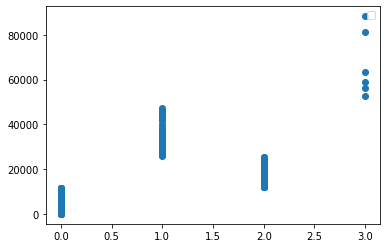

In [429]:
plt.scatter(df1['label'], df1['diffs'])
plt.legend()
plt.show()

In [431]:
df_res = pd.merge(df1, df_final, how='left', on='diffs')

In [432]:
df_res.shape

(403, 9)

In [433]:
df_res['label'] = df_res.label.map({1.0:'Safe',
                3.0:'Safe',
                2.0:'Favorable',
                0.0:'Battle-Ground'})
df_res

diffs          label  index         AC_Name Position  \
0     6415.0  Battle-Ground      6      Agra Cantt        1   
1    23356.0      Favorable      6      Agra North        1   
2    18754.0      Favorable      5      Agra Rural        1   
3    22960.0      Favorable     13      Agra South        1   
4     2083.0  Battle-Ground     19         Ajagara        1   
..       ...            ...    ...             ...      ...   
398  13822.0      Favorable     10  Varanasi South        1   
399   5417.0  Battle-Ground     16        Zafrabad        1   
400  10478.0  Battle-Ground     11      Zahoorabad        1   
401  23041.0      Favorable      6         Zaidpur        1   
402  29440.0           Safe      8         Zamania        1   

                              Name  Votes Votes %                  Party  
0              Gutiyari Lal Duwesh  67786   32.5%    Bahujan Samaj Party  
1                Jagan Prasad Garg  68401   34.8%  Bharatiya Janta Party  
2                Kali Charan Suman  69969   34.8%    Bahujan Samaj Party  
3               Yogendra Upadhyaya  74324   37.8%  Bharatiya Janta Party  
4                    Tribhuvan Ram  60239   32.3%    Bahujan Samaj Party  
..                             ...    ...     ...                    ...  
398  Shyamdev Roy Chaudhari (Dada)  57868   38.2%  Bharatiya Janta Party  
399        Sachindra Nath Tripathi  59419   30.7%        Samajwadi Party  
400            Syeda Shadab Fatima  67012   33.0%        Samajwadi Party  
401                       Ramgopal  76869   33.8%        Samajwadi Party  
402                      Omprakash  83407   41.5%        Samajwadi Party  

[403 rows x 9 columns]

In [434]:
df_second = df_final[df_final['Position'] == 2]
dict_cols = {'Name':'2_Name', 'Votes':'2_Votes', 'Votes %': '2_Votes %', 'Party':'2_party'}
df_second.rename(columns=dict_cols, inplace=True)
df_second = df_second[['AC_Name', '2_Name', '2_Votes', '2_Votes %', '2_party']].sort_values('AC_Name')
df_second.head()

AC_Name                                 2_Name  2_Votes 2_Votes %  \
4707  Agra Cantt  Girraj Singh Dharmesh (G.S. Dharmesh)    61371     29.4%   
3852  Agra North                   Rajesh Kumar Agrawal    45045     22.9%   
5222  Agra Rural                                Hemlata    51215     25.5%   
5253  Agra South                 Zulfiquar Ahmed Bhutto    51364     26.1%   
1063     Ajagara                                  Lalji    58156     31.2%   

                    2_party  
4707  Bharatiya Janta Party  
3852    Bahujan Samaj Party  
5222        Samajwadi Party  
5253    Bahujan Samaj Party  
1063        Samajwadi Party

In [435]:
df_res = df_res.sort_values('AC_Name')
df_res.head()

diffs          label  index     AC_Name Position                 Name  \
0   6415.0  Battle-Ground      6  Agra Cantt        1  Gutiyari Lal Duwesh   
1  23356.0      Favorable      6  Agra North        1    Jagan Prasad Garg   
2  18754.0      Favorable      5  Agra Rural        1    Kali Charan Suman   
3  22960.0      Favorable     13  Agra South        1   Yogendra Upadhyaya   
4   2083.0  Battle-Ground     19     Ajagara        1        Tribhuvan Ram   

   Votes Votes %                  Party  
0  67786   32.5%    Bahujan Samaj Party  
1  68401   34.8%  Bharatiya Janta Party  
2  69969   34.8%    Bahujan Samaj Party  
3  74324   37.8%  Bharatiya Janta Party  
4  60239   32.3%    Bahujan Samaj Party

In [446]:
df_res.shape # (407, 9)
df_second.shape # (403, 5)

(403, 5)

In [454]:
df_res = pd.merge(df_res, df_second, how='inner', on='AC_Name')

In [456]:
df_res.to_excel('2012_Analysis_1.xlsx')

In [312]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_res, 
                 path=[px.Constant('all'), 'Party','AC_Name','label'], 
                 values='diffs',
                 color='label',
                 color_discrete_map={'Safe':'#BCEE68', 'Favorable':'#00EEEE', 'Battle-Ground':'#EE4000'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>